In [1]:
# !pip install collections
# !/Users/karthikmittal/anaconda3/bin/python -m pip install --upgrade pip
# !pip install colormap
# !pip install easydev

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline


In [2]:
def get_image(image_path):
    image = cv2.imread(image_path)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [ ]:
image = get_image('./image_eye.jpg')
height, width, channels = image.shape 
print(height, width)
image = image[0:100, 80:170]
height, width, channels = image.shape 
print(height, width)
modified_image = image
cv2.imshow("image", image)
cv2.waitKey(0)

100 250
100 90


In [6]:
# modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
# cv2.imshow("mod",modified_image)
# cv2.waitKey(0)

In [7]:
clf = KMeans(n_clusters = 8)
labels = clf.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x7fdd119dae48>,
 [Text(1.0287167329054754, 0.3895406056373134, '#c0c2c7'),
  Text(0.4109989942096047, 1.0203331939904208, '#527689'),
  Text(-0.509285317388475, 0.9750017771740318, '#273348'),
  Text(-1.085603271382745, 0.17738527887928637, '#778587'),
  Text(-0.5884365599339278, -0.9293774340563284, '#141f2e'),
  Text(0.34612071948125833, -1.0441266434421526, '#959ca4'),
  Text(0.7076544695360374, -0.8421550639553678, '#385166'),
  Text(1.026248882169922, -0.39599650483935517, '#636969')])

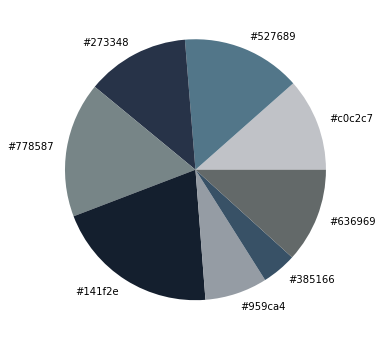

In [8]:
counts = Counter(labels)
center_colors = clf.cluster_centers_

ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8,6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

In [9]:
print(rgb_colors)

[array([192.75      , 194.97938144, 199.81185567]), array([ 82.19622642, 118.91509434, 137.38396226]), array([39.20195931, 51.90504898, 72.46345139]), array([119.88870793, 133.13735071, 135.99294245]), array([20.99710704, 31.66248795, 46.60655738]), array([149.8583691 , 156.94849785, 164.30758226]), array([ 56.4559721 ,  81.58936356, 102.67131648]), array([ 99.14866667, 105.262     , 105.48      ])]


In [10]:
# !pip install webcolors
import webcolors

color_names = []
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

for i in rgb_colors:
    requested_colour = [i[0], i[1], i[2]]
    actual_name, closest_name = get_colour_name(requested_colour)
    if (actual_name != None):
        color_names.append(actual_name)
    else:
        color_names.append(closest_name)

print(color_names)

['silver', 'slategray', 'darkslategray', 'slategray', 'black', 'darkgray', 'darkslategray', 'dimgray']
